# The-Social-Dilemma-Tweet-Analysis-NLP

### Importing Libraries and Dataset

In [2]:
pip install contractions

     -------------------------------------- 287.5/287.5 kB 4.5 MB/s eta 0:00:00


In [4]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Visualisation and dataframes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Text Preprocessing
import re
import nltk
import unicodedata
import contractions
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


# Vectorization and train-test-split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# metrics
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, 
                             plot_confusion_matrix,
                             accuracy_score, 
                             roc_auc_score, 
                             roc_curve)


# Others
import warnings
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_colwidth',None)

In [7]:
df = pd.read_csv("TheSocialDilemma.csv")

In [8]:
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Media Thought Leader | Keynote Speaker | Dynamic Live Video Host | Ambassador | 🇨🇦🏴󠁧󠁢󠁳󠁣󠁴󠁿🇺🇸,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebook I'm also reminded of the very poignant quote by French philosopher… https://t.co/CA52aepW6K,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Media Thought Leader | Keynote Speaker | Dynamic Live Video Host | Ambassador | 🇨🇦🏴󠁧󠁢󠁳󠁣󠁴󠁿🇺🇸,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,"@musicmadmarc @SocialDilemma_ @netflix @Facebook haa, hey Marc. I get what you're saying &amp; don't agree. 🤪\r\n\r\nWhicheve… https://t.co/nsVtPHjUs8",NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Expert 💻 | Socially Liberal | Travel Enthu | Beer Lover | Passionate about Slow & Sustainable Travel (& Living too),2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\r\n\r\nIt’s the best 100 minutes you’ll spend in 2020. I bet you💯… https://t.co/GSWCx3E9tG,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales","Head of Diversity & Inclusion @RugbyAU | It's not a tan, I'm Aboriginal. A gay one 🏳️‍🌈 | IG: casey_conway | 100% my views etc ✌🏾",2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m scared for humanity. \r\n\r\nI’m not sure what to do but I’ve logged out of F… https://t.co/luOBcjCJFb,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the time while trying to watch #TheSocialDilemma 🤦🏼‍♀️,['TheSocialDilemma'],Twitter for iPhone,False,Positive
5,Denny Hulme,"Manchester, England",NaN,2009-11-06 15:20:09,336,616,4748,False,2020-09-16 20:50:33,#TheSocialDilemma 😳 wow!! We need regulations on social media platforms and quick!!,['TheSocialDilemma'],Twitter for iPhone,False,Positive
6,Serkan Hicranlı,NaN,"Küçük küçük şeyler söyler, küçük küçük videolar yaparım. “Dokunduğum küldür uçar, sunduğum tozdur silinir.”",2017-11-18 14:31:43,120,841,546,False,2020-09-16 20:49:00,@harari_yuval what do you think about #TheSocialDilemma @ Netflix,['TheSocialDilemma'],Twitter for iPhone,False,Neutral
7,Laura,Kent,"Mother, optimist, feminist, pacifist, retired delinquent, hermit, wine & cheese lover, bookworm, bore, criminal mastermind & liar. Volunteer for @thehygienebank",2009-02-05 20:39:55,696,444,10551,False,2020-09-16 20:48:55,Erm #TheSocialDilemma makes me want to go off grid and live in a cave with a tinfoil hat. I mean obviously after I’… https://t.co/AQhtCoQR77,['TheSocialDilemma'],Twitter for iPhone,False,Negative
8,Eugene🍫,South Africa,African🌍 | Music🎶 | Lakers🏀|Manchester United ⚽| 🍫Dark Chocolate 85% Cocoa,2012-10-25 09:16:10,2180,1570,18692,False,2020-09-16 20:48:47,"#TheSocialDilemma is not a documentary, it's horror we live in.",['TheSocialDilemma'],Twitter for Android,False,Positive
9,RYAN,"Dallas, TX",IG:@RYANWHITEC 💻Digital Content Creator. 97.9 THE BEAT. 🎧OPEN-FORMAT DJ. Co-Host on a Podcast 🎙,2010-04-23 01:34:20,5011,2422,619,False,2020-09-16 20:47:18,Okay i’m watching #TheSocialDilemma now.,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [9]:
df.shape

(20068, 14)

In [10]:
df.describe()

,user_followers,user_friends,user_favourites
count,2.006800e+04,20068.000000,20068.000000
mean,8.805132e+03,1117.027656,13936.924606
std,1.540008e+05,5169.791715,30437.971876
min,0.000000e+00,0.000000,0.000000
25%,9.700000e+01,186.000000,789.000000
50%,3.660000e+02,441.000000,3866.500000
75%,1.289000e+03,1001.000000,13294.500000
max,1.562443e+07,288625.000000,708749.000000


### EDA (Exploratory Data Analysis)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB


### 1. Missing values

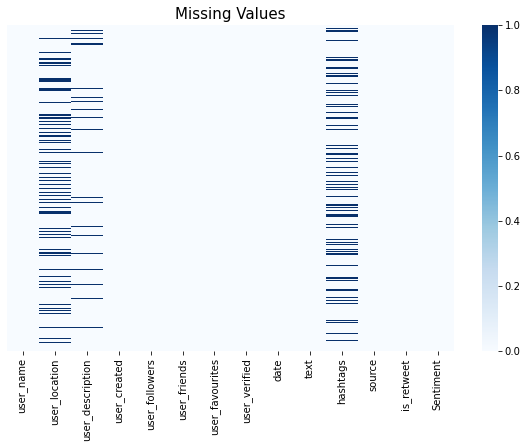

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues')
plt.title("Missing Values", fontsize = 15)
plt.show()

In [13]:
df.isnull().sum()

user_name              1
user_location       4208
user_description    1383
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4297
source                 0
is_retweet             0
Sentiment              0
dtype: int64

- hashtags, user_location and user_description has missing values

In [14]:
# Plotting the distribution of missing values

def plot_missing_values(df):
    # creating df of missing values
    missing = df.isnull().sum()
    missing = missing[missing>0]
    missing.sort_values(inplace = True)
    missing = missing.to_frame()
    missing.columns = ['Count']
    
    # plotting the missing values using barplot
    sns.barplot(x = missing.index, y = missing.Count)
    return missing

,Count
user_name,1
user_description,1383
user_location,4208
hashtags,4297


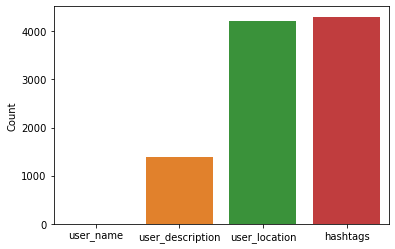

In [15]:
plot_missing_values(df)

- We can see that more data is missing from the hashtags and user_location columns

In [16]:
# finding the unique values from every column
def unique_df(df):
    unique = []
    for f in df.columns:
        unique.append(df[f].nunique())

    unique_df = pd.DataFrame(unique,index=df.columns, columns = ['Unique Values'])
    return unique_df.sort_values('Unique Values', ascending = False)
unique_df = unique_df(df)
unique_df

,Unique Values
text,19850
date,19811
user_created,16109
user_name,15737
user_description,14899
user_favourites,9945
user_location,5777
user_followers,4141
user_friends,3220
hashtags,1753


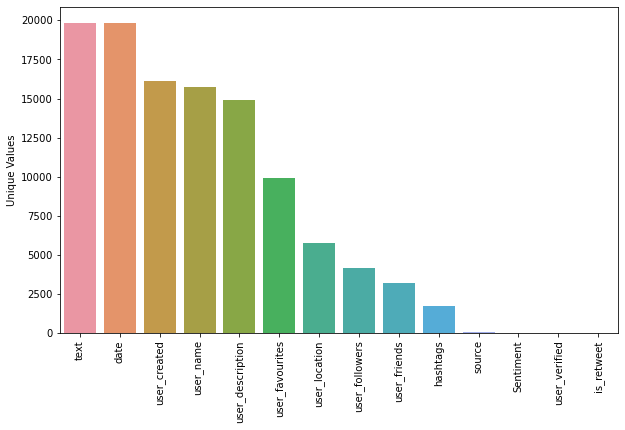

In [17]:
# Plotting the unique values as barplot
plt.figure(figsize = (10, 6))
sns.barplot(x = unique_df.index, y = 'Unique Values', data = unique_df)
plt.xticks(rotation = 'vertical')
plt.show()

### 3. Label Distribution

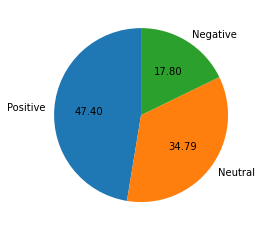

In [18]:
# plotting the sentiment label distribution
df['Sentiment'].value_counts()
plt.pie(df['Sentiment'].value_counts(),
                labels=df['Sentiment'].value_counts().index, 
                startangle=90,
                autopct='%.2f')
plt.show()

- Most of the tweets are positive in nature (47.4%), which indicates a wide appreciation of the documentary among users, followed by 34.79% neutral and 17.8% negative tweets.

### 4. Distributions based on Number of Tweets

In [19]:
# function for printing detailed barplot for top 20 items
def detailed_barplot(df, feature, title):
    
    # creating normal barplot 
    plt.figure(figsize = (15, 7))
    sns.barplot(x = df[feature].value_counts().index[:20], y = df[feature].value_counts()[:20])
    
    # creating percent distribution array
    total = len(df[feature])
    Y =  df[feature].value_counts()[:20]
    for i in range(20):
        plt.text(i, Y[i], s = "{:1.2f}%".format((100 * Y[i])/ total), ha = 'center', va = 'bottom')


    # adding titles
    plt.title(f"Frequency of {title} tweeting about 'The Social Dilemma'", fontsize = 15)
    plt.xlabel("User Names", fontsize = 15)
    plt.ylabel("Count", fontsize = 15)
    plt.xticks(rotation = 90, fontsize = 13)
    plt.show()

### 4.1 Plotting top 20 users by number of tweets

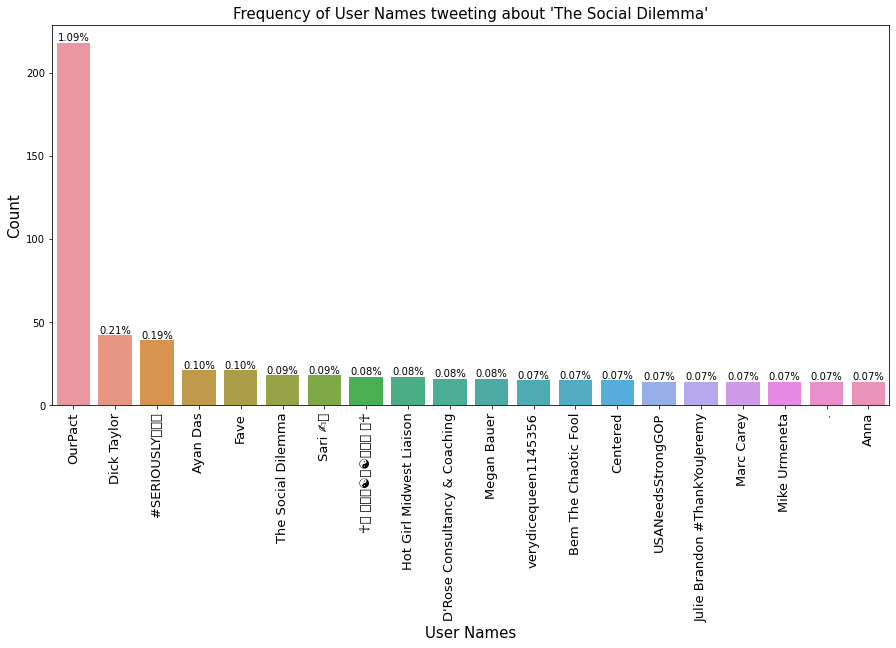

In [20]:
detailed_barplot(df, 'user_name', "User Names")

- User OurPact has the maximum number of tweets regarding The Social Dilemma followed by Dick Taylor and #Seriously

### 4.2 Plotting the top 20 sources from which user tweeted based on number of tweets

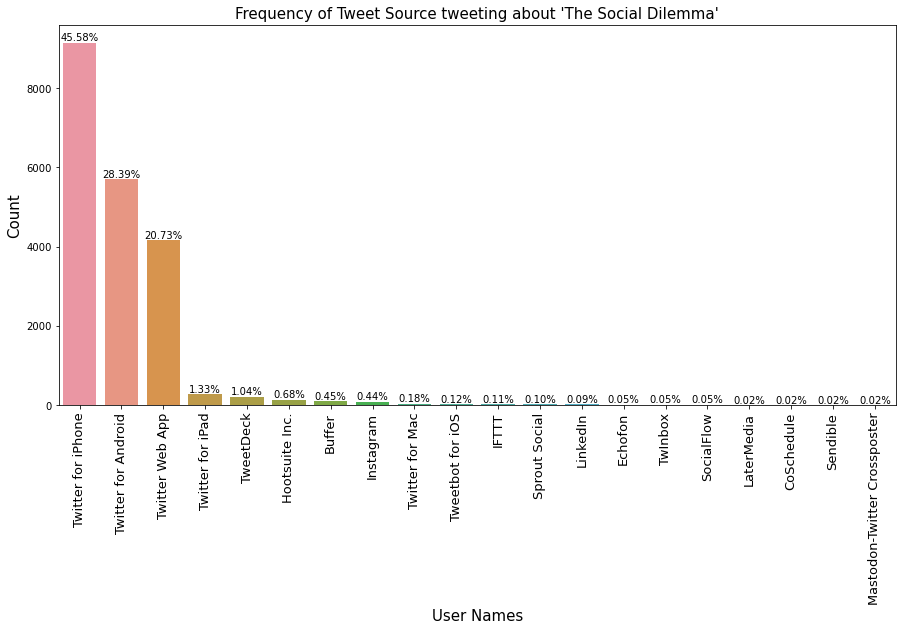

In [21]:
detailed_barplot(df, "source", "Tweet Source")

- The highest number of tweets on The Social Dilemma are made from users with iPhone followed by Android and the Twitter Web App. This tells that the welthiest gentry are more active on twitter.

### 4.3 Plotting the top 20 places from which the users have tweeted the most

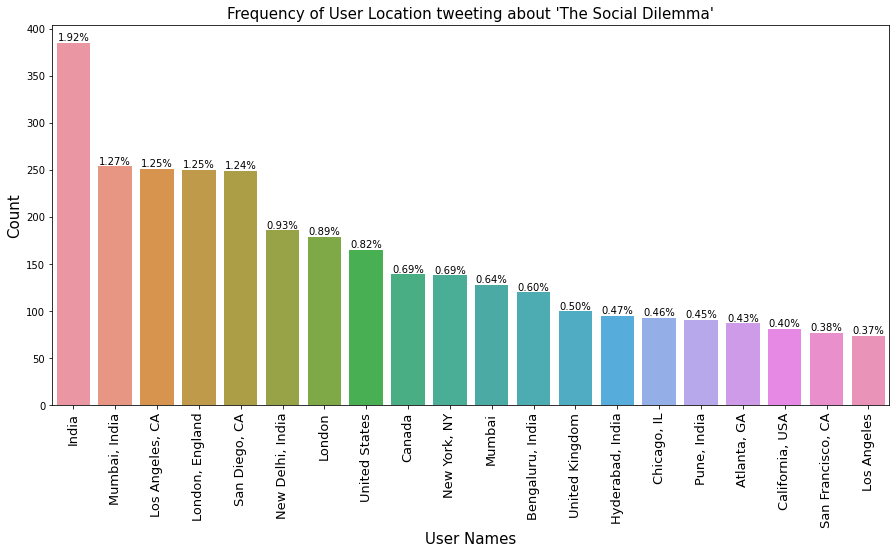

In [22]:
detailed_barplot(df, "user_location", "User Location")

As we can see that the locations are not segregated properly into states and countries, we do this and then plot the distribution of locations per tweet again

In [23]:
# Segregating States and Countries from user_location

def make_location(df):
    # taking top 50 locations based on number of tweets
    ldf = df['user_location'].value_counts().reset_index()  # get the counts of tweets which contains a fixed no of hashtags
    ldf.columns = ['user_location', 'count']
    ldf = ldf.sort_values(['count'],ascending=False)[:50] #top 50 places

    
    # appending full names to location otherwise None
    location = []
    for i in ldf['user_location']:
        if len(i.split(','))>1:
            location.append(i)
        else:
            location.append("None")
    
    ldf['location'] = location
    ldf = ldf[ldf['location']!='None'].reset_index(drop = True)
    ldf = ldf.sort_values(by = 'count', ascending = False, ignore_index = False)
    return ldf

In [24]:
ldf = make_location(df)
print(ldf.head())
ldf.drop('location', inplace = True, axis = 1)
len(ldf)

      user_location  count          location
0     Mumbai, India    254     Mumbai, India
1   Los Angeles, CA    251   Los Angeles, CA
2   London, England    250   London, England
3     San Diego, CA    249     San Diego, CA
4  New Delhi, India    186  New Delhi, India


31

Now there are only 31 rows with proper location. We could've done that to the entire df but for visualisation purpose, top 31 locations will do fine in telling the distribution

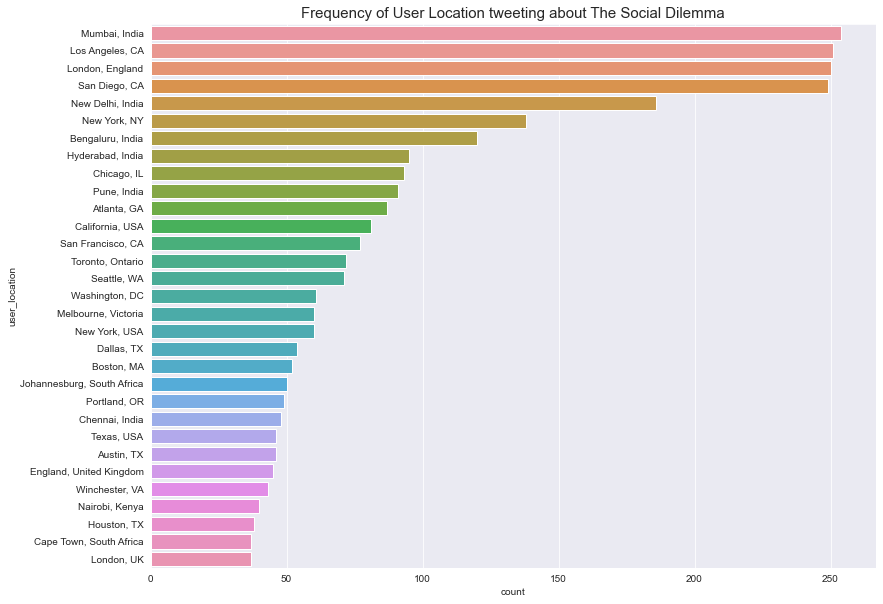

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize = (13, 10))
sns.barplot(x = ldf['count'], y = ldf['user_location'], data = ldf
           ).set_title("Frequency of User Location tweeting about The Social Dilemma", fontsize = 15)
plt.show()

As we can see the maximum number of tweets were made from Mumbai, India followed by California and England

### 4.4 Plotting the number of hashtags used by users in each tweet

In [26]:
def plot_hastags():
    # filling NA values for hashtags and creating hashtag count based on len of hashtag list.split(',')
    df['hashtags'] = df['hashtags'].fillna('[]')
    df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
    df.loc[df['hashtags'] == '[]', 'hashtags_count'] = 0   
    df

    # making new hashtag df
    ds = df['hashtags_count'].value_counts().reset_index()  # get the counts of tweets which contains a fixed no of hashtags
    ds.columns = ['hashtags_count', 'count']
    ds = ds.sort_values(['count'],ascending=False)   # Arrange them in descending order
    ds['hashtags_count'] = ds['hashtags_count'].astype(str)

    # plotting barplot
    plt.figure(figsize = (10,6))
    sns.barplot(x=ds["count"], y=ds["hashtags_count"], orientation='horizontal'
               ).set_title('Distribution of number of hashtags in tweets', fontsize = 13)

    plt.ylabel('Number of hashtags', fontsize = 13)
    plt.show()

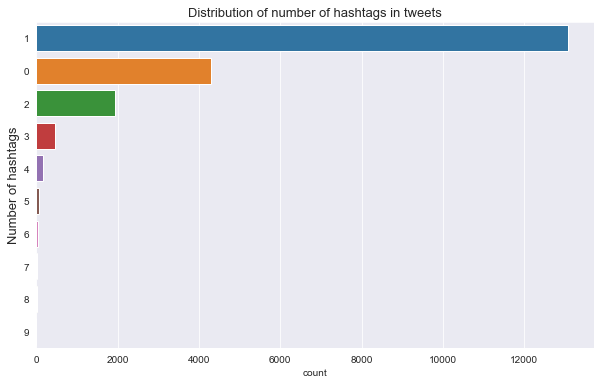

In [27]:
plot_hastags()

- Most users use just 1 hashtag, and the second most likely scenario is no hashtags.
- Only a small proportion of the tweets use two hashtags or more.

### 4.5 Plotting the most used Hashtags

In [28]:
hashdf = df['hashtags'].to_frame()
hashtag = []
def split_hashtags(x):
    return str(x).replace('[', '').replace(']', '').split(',')

hashdf['hashtags'] = hashdf['hashtags'].apply(lambda x : split_hashtags(x))

# coverting each list item to a row
hashdf = hashdf.explode('hashtags')
# keeping only non empty tags
hashdf = hashdf[hashdf.hashtags != '']

hashdf = hashdf.reset_index(drop = True)

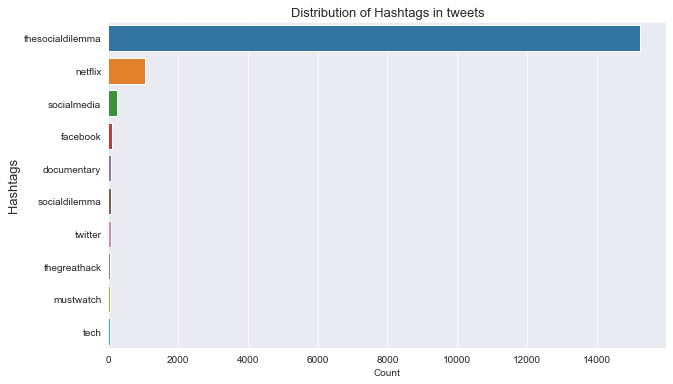

In [29]:
# lowercasing the hashtags and adding counts of each hashtag
def clean_hashtag(x):
    return x.lower().replace("'", '').replace(" ", '')

hashdf['hashtags'] = hashdf['hashtags'].apply(lambda x : clean_hashtag(x))
ds = hashdf['hashtags'].value_counts().reset_index()
ds.columns = ['Hashtags', 'Count']

# plotting barplot
plt.figure(figsize = (10,6))
sns.barplot(x =  ds.head(10)['Count'],
            y =  ds.head(10)['Hashtags'], 
            orientation='horizontal'
               ).set_title('Distribution of Hashtags in tweets', fontsize = 13)

plt.ylabel('Hashtags', fontsize = 13)
plt.show()

- Majority of tweets contain the thesocialdilemma hashtag followed by netflix and socialmedia hashtags

### 4.6 Plotting tweet distribution by date and time

In [30]:
def filter_DateTime(df):
    date = []
    time = []
    
    for i in df['date']:
        d = i.split()
        date.append(d[0])
        time.append(d[1])
    df['tweet_date'] = date
    df['tweet_time'] = time
    return df

df = filter_DateTime(df)
df.drop('date', axis = 1, inplace = True)

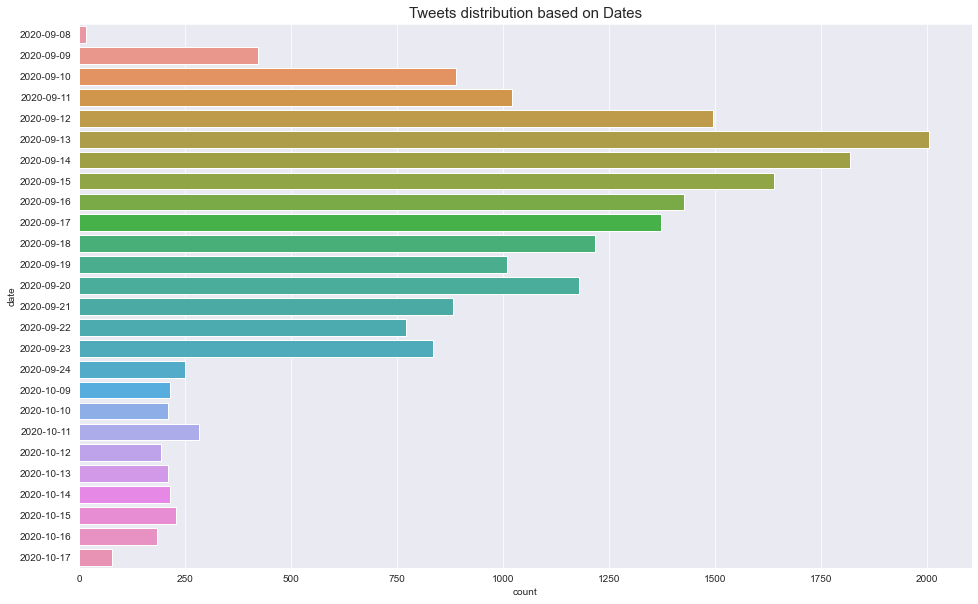

In [31]:
# making df of date and count
ds = df['tweet_date'].value_counts().reset_index() 
ds.columns = ['date', 'count']
ds = ds.sort_values(['date'])

# plotting the barplot
plt.figure(figsize = (16,10))
sns.barplot(x=ds['count'], y=ds['date'], orientation='horizontal', data = df
               ).set_title('Tweets distribution based on Dates', fontsize = 15)
plt.show()

- The documentary was released on one of the major OTT platform(Netflix) on Sept 9th, 2020. It started creating quite a buzz on the social media platforms like twitter, where people started to voice out their concerns on the impact of social media.
- We can identify a steady increase in the number of tweets after Sept 9th, 2020 but after a week's time, the hype among people gradually decreased majorly after Sept 23rd, 2020

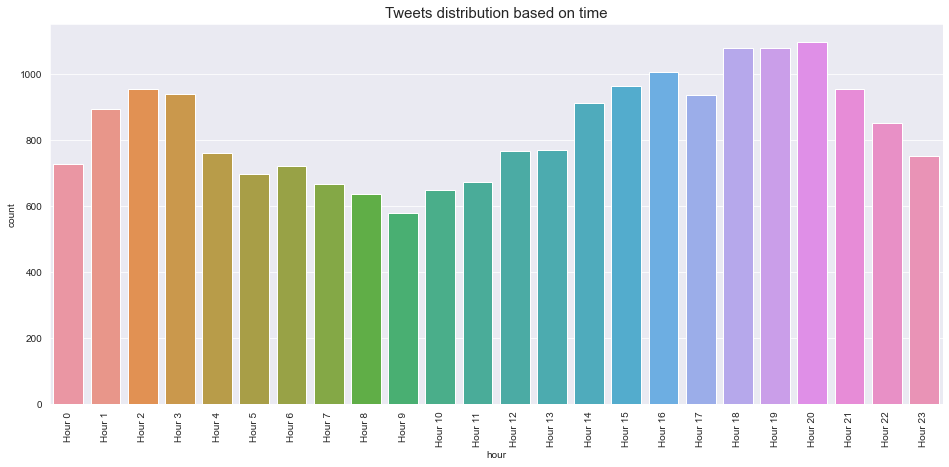

In [32]:
# making df of time and count
df['tweet_time'] = pd.to_datetime(df['tweet_time']) #change the format into datetime readable
df['hour'] = df['tweet_time'].dt.hour    # get the hour of every tweet
ds = df['hour'].value_counts().reset_index()  
ds.columns = ['hour', 'count']
ds = ds.sort_values(['hour'])
ds['hour'] = 'Hour ' + ds['hour'].astype(str)

# plotting the barplot
plt.figure(figsize=(16, 7))
fig = sns.barplot( 
    x=ds["hour"], 
    y=ds["count"], 
    orientation='vertical', 
).set_title('Tweets distribution based on time', fontsize = 15)
plt.xticks(rotation='vertical')
plt.show()

- The majority of the tweets appear to be from the second half of the day as opposed to the first.

- In the second half, the tweeting appears to peak from 6 pm to 8 pm, while during the first half, the peak appears to be late in the night, between 1 am to 3 am. Only a minority of tweets are sent in the morning, which appears logical.

### 5. Distribution of Words based on each Label Class

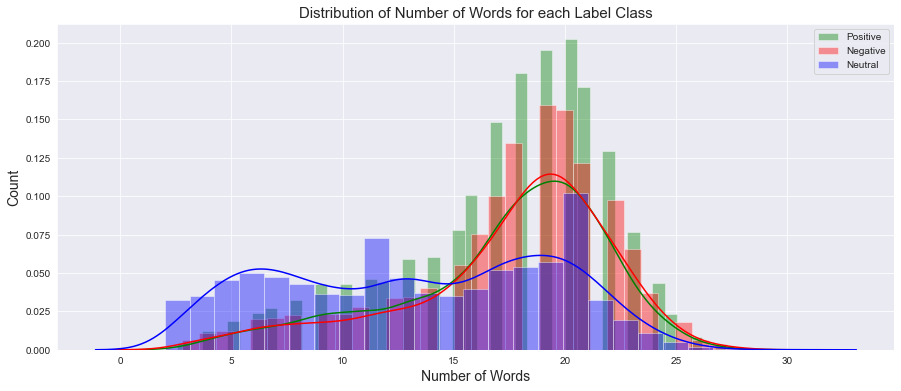

In [33]:
# get the word count for every text
df['word_count'] = [len(t.split()) for t in df.text]

# plot the distplots 
fig = plt.figure(figsize = (15, 6))
sns.distplot(df['word_count'][df['Sentiment']=='Positive'], color='g', label = 'Positive')
sns.distplot(df['word_count'][df['Sentiment']=='Negative'], color='r', label = 'Negative')
sns.distplot(df['word_count'][df['Sentiment']=='Neutral'], color='b', label = 'Neutral')
plt.legend(loc='best')
plt.xlabel('Number of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Distribution of Number of Words for each Label Class', size = 15)
plt.show()

- Postive sentiment tweets have more words followed by Negative and Neutral respectively.
- The plot is near-normal distribution.

### 6. WordCloud based on Sentiments of the Tweets

In [35]:
pos_tweet = df[df.Sentiment == 'Positive']
neg_tweet = df[df.Sentiment == 'Negative']
neut_tweet = df[df.Sentiment == 'Neutral']

string1 = " ".join(pos_tweet["text"]) 
string2 = " ".join(neg_tweet["text"]) 
string3 = " ".join(neut_tweet["text"]) 

In [36]:
def plot_wordCloud(string, sentiment):
    cleaned_word = " ".join([word for word in string.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT' and word !='The Social Dilemma' and word !='TheSocialDilemma'
                            ])
    
    wordcloud =  WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=800,
                      height=700
                     ).generate(cleaned_word)
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'WordCloud for {sentiment} sentiment', size = 15)
    plt.show()

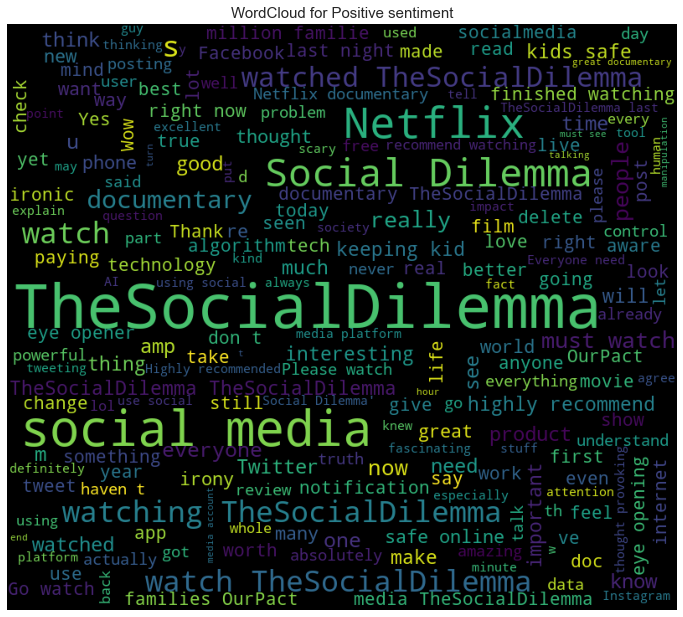

In [37]:
plot_wordCloud(string1, "Positive")

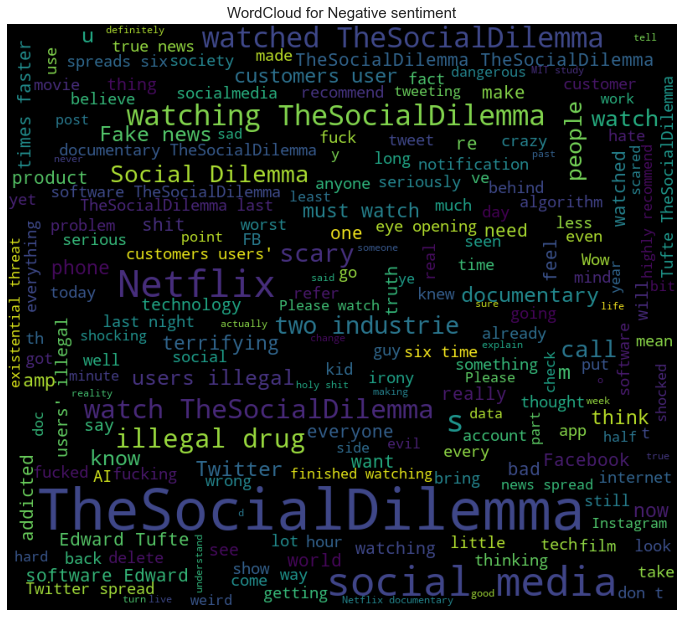

In [38]:
plot_wordCloud(string2, "Negative")

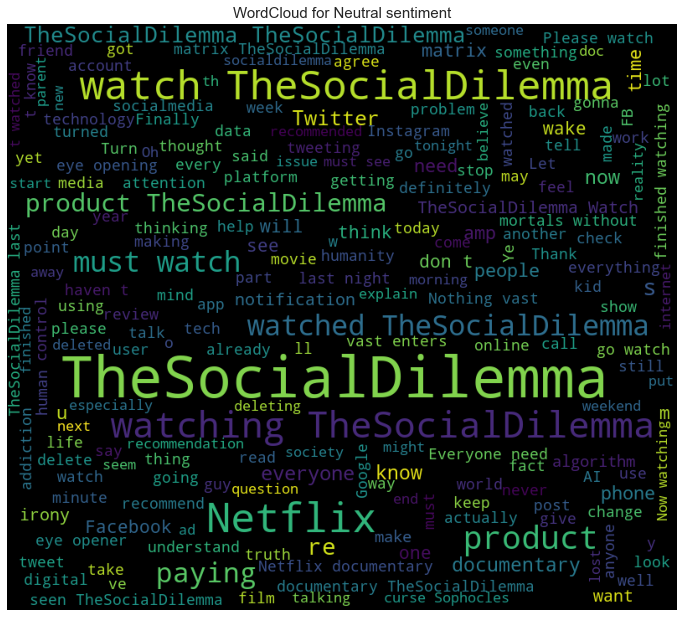

In [39]:
plot_wordCloud(string3, "Neutral")

- Interesting, must watch, Please watch, highly recommend, important and eye opening, are the most common positive sentiment
- Illegal,irony, drug, bad, terrifying, addicted, scary, crazy are some of the most common negative sentiment
- watch, everything, paying, product, are the most common words in neutral sentiment

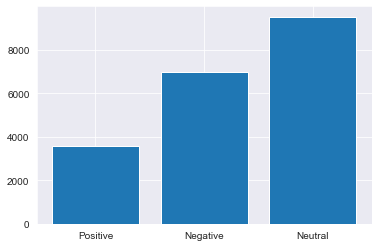

In [65]:
labels = df['Sentiment']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
classes = ['Positive', 'Negative', 'Neutral']
plt.bar(classes,counts)
plt.show()
for i in values:
    print(classes[i[0]],' : ',i[1])


Neutral  :  3573    
Positive  :  6982         
Negative  :  9513

### EDA - Conclusion

**Missing Values**
- We can see that more data is missing from the hashtags and user_location columns

**Sentiment Distribution**
- Most of the tweets are positive in nature (47.4%), which indicates a wide appreciation of the documentary among users, followed by 34.79% neutral and 17.8% negative tweets.

**User Tweet Distribution**
- User OurPact has the maximum number of tweets regarding The Social Dilemma followed by Dick Taylor and #Seriously

**Tweet Source**
- The highest number of tweets on The Social Dilemma are made from users with iPhone followed by Android and the Twitter Web App. This tells that the welthiest gentry are more active on twitter.

**Tweet Location**
- As we can see the maximum number of tweets were made from Mumbai, India followed by LA and San Diego, California and London,England

**Distribution of hashtags**
- Most users use just 1 hashtag, and the second most likely scenario is no hashtags.
- Only a small proportion of the tweets use two hashtags or more.
- Majority of tweets contain the thesocialdilemma hashtag followed by netflix and socialmedia hashtags

**Tweet Date**
- The documentary was released on one of the major OTT platform(Netflix) on Sept 9th, 2020. It started creating quite a buzz on the social media platforms like twitter, where people started to voice out their concerns on the impact of social media.
- We can identify a steady increase in the number of tweets after Sept 9th, 2020 but after a week's time, the hype among people gradually decreased majorly after Sept 23rd, 2020.

**Tweet Time**
- The majority of the tweets appear to be from the second half of the day as opposed to the first.
- In the second half, the tweeting appears to peak from 6 pm to 8 pm, while during the first half, the peak appears to be late in the night, between 1 am to 3 am. Only a minority of tweets are sent in the morning, which appears logical.

**Word Distribution**
- Postive sentiment tweets have more words followed by Negative and Neutral respectively.
- The plot is near-normal distribution

**Common Word Distribution**
- Interesting, must watch, Please watch, highly recommend, important and eye opening, are the most common positive sentiment
- Illegal,irony, drug, bad, terrifying, addicted, scary, crazy are some of the most common negative sentiment
- watch, everything, paying, product, are the most common words in neutral sentiment

**Class Distribution**
- The classes are not equally distrtiuted with most comments being neutral followed by negative and then positve

### Text Preprocessing

In [66]:
stopwords_list = set(stopwords.words("english"))
stopwords_list.remove('not')
stopwords_list.remove('no')
stopwords_list.add('I')

def clean_text(text, lemma = True):
    # lowercase
    text = text.lower()
            
    # URL removal
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'', text)
    
    # replace contractions
    text = contractions.fix(text)
    
    # replace accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # remove special characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    
    # emoji removal
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # split text to remove stopwords and lemmatize the text
    text = text.split()

    # remove stopwords
    text = [word for word in text if word not in stopwords_list]
    
    # lemmatizing
    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()

    if lemma:
        text = [lemmatizer.lemmatize(word) for word in text]
        text = [lemmatizer.lemmatize(word, "v") for word in text]
    else:
        text = [ps.stem(word) for word in text]
        
    return ' '.join(text)

In [67]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'text', 'hashtags', 'source', 'is_retweet', 'Sentiment',
       'hashtags_count', 'tweet_date', 'tweet_time', 'hour', 'word_count'],
      dtype='object')

In [68]:
# cleaning the tweets text
data = df[['text', 'Sentiment']]
data['text'] = data['text'].apply(lambda x : clean_text(x))

# converting the sentiment into integer labels - (-1, 0, 1)
replaceStruct = {"Sentiment": {"Neutral": 0, "Positive":1,"Negative":2}}
data = data.replace(replaceStruct)

### EDA on preprocessed text

In [69]:
# making X and Y
X = data['text']
y = data.Sentiment
print(X.shape)
print(y.shape)

(20068,)
(20068,)


In [70]:
data.text.describe()

count                                        20068
unique                                       18470
top       not pay product product thesocialdilemma
freq                                           218
Name: text, dtype: object

In [71]:
# finding the unique words from the text
total_words = []
for i in X:
    for j in i.split():
        total_words.append(j)
unique, counts = np.unique(total_words, return_counts=True)
print("The total words in the tweets are        : ", len(total_words))
print("The total UNIQUE words in the tweets are : ", len(unique))

The total words in the tweets are        :  170219
The total UNIQUE words in the tweets are :  13955


In [72]:
ndf = pd.DataFrame({"Words" : unique, "Count":counts })
ndf = ndf.sort_values(by ='Count', ascending=False)

In [73]:
ndf['Count'].describe()

count    13955.000000
mean        12.197707
std        171.385485
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      15176.000000
Name: Count, dtype: float64

In [74]:
# for resuse when required
data.to_csv("Processed_data.csv")

 Now we can move on to vectorizing the text base TFIDF and CountVectorizer

### Vectorization

In [75]:
# Instanciating Vectorizer objects
# cv = CountVectorizer(max_features=7000)
tfidf = TfidfVectorizer(max_features=7000)
# X1 = cv.fit_transform(X).toarray()
X = tfidf.fit_transform(X).toarray()

### Model Training

1.  Logistic Regression

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [77]:
# for i in classifiers:
#     i.fit(X_train, y_train)
#     print(i, " : ", give_score(i))

lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced',verbose=1, solver = 'saga', penalty = 'l2')
lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 30 epochs took 90 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


LogisticRegression(class_weight='balanced', n_jobs=-1, solver='saga', verbose=1)

In [78]:
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)

In [79]:
from sklearn.metrics import classification_report

# train data  
print(classification_report(y_train, ytrain_pred))

# test data
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5656
           1       0.96      0.88      0.92      7529
           2       0.83      0.91      0.87      2869

    accuracy                           0.91     16054
   macro avg       0.90      0.91      0.90     16054
weighted avg       0.91      0.91      0.91     16054

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1326
           1       0.92      0.83      0.87      1984
           2       0.74      0.74      0.74       704

    accuracy                           0.84      4014
   macro avg       0.82      0.83      0.82      4014
weighted avg       0.85      0.84      0.84      4014



2. Random Forest Classifier

In [80]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [82]:
# train data  
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5656
           1       1.00      1.00      1.00      7529
           2       1.00      1.00      1.00      2869

    accuracy                           1.00     16054
   macro avg       1.00      1.00      1.00     16054
weighted avg       1.00      1.00      1.00     16054



In [84]:
# test data
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1326
           1       0.87      0.88      0.88      1984
           2       0.85      0.52      0.64       704

    accuracy                           0.84      4014
   macro avg       0.84      0.78      0.79      4014
weighted avg       0.84      0.84      0.83      4014



## Conclusion

- RandomForest overfits the training data completely without any hyperparameter tuning and therefore results in an 84% accuracy score.
- Logistic regression gives an accuracy score of 84% after hyperparameter tuning with saga solver and l2 regularisation.